In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

course_data = pd.read_csv("processed-quantitative-course-data.csv")
course_data['q1-q2-rate-percent-diff'] = ((course_data['q1-response-rate'] -\
                            course_data['q2-response-rate'])/\
                            (course_data['q1-response-rate'] +\
                            course_data['q2-response-rate'])) * 100

course_data['q1-q2-wc-percent-diff'] = ((course_data['q1-avg-word-count'] -\
                            course_data['q2-avg-word-count'])/\
                            (course_data['q1-avg-word-count'] +\
                            course_data['q2-avg-word-count'])) * 100
                            
course_data

,program,course,q1-response-rate,q2-response-rate,q3-response-rate,max-response-rate,q1-avg-word-count,q2-avg-word-count,q3-avg-word-count,total-avg-word-count,q1-q2-rate-percent-diff,q1-q2-wc-percent-diff
0,L.tsv,L,0.5556,0.3778,0.3333,0.5556,20.8,17.2,16.0,18.0,19.048639,9.473684
1,M.tsv,M,0.4444,0.3556,0.2444,0.4444,12.6,17.1,11.2,13.6,11.100000,-15.151515
2,O.tsv,O,0.6667,0.4889,0.2889,0.6667,12.9,17.4,15.6,15.3,15.385947,-14.851485
3,N.tsv,N,0.3778,0.3556,0.1778,0.3778,15.7,20.4,20.0,18.7,3.026998,-13.019391
4,J.tsv,J,0.4444,0.4444,0.3556,0.4444,19.9,21.9,24.1,22.0,0.000000,-4.784689
5,K.tsv,K,0.3333,0.3556,0.2667,0.3556,15.1,31.9,22.0,23.0,-3.237045,-35.744681
6,I.tsv,I,0.5000,0.4667,0.3037,0.5000,20.1,21.8,19.8,20.6,3.444709,-4.057279
7,H.tsv,H,0.2000,0.1778,0.2667,0.2667,16.2,32.1,46.3,31.5,5.876125,-32.919255
8,E.tsv,E,0.6222,0.5852,0.4000,0.6222,15.6,17.8,17.2,16.9,3.064436,-6.586826
9,D.tsv,D,1.0000,1.0000,0.8889,1.0000,16.9,23.7,19.7,20.1,0.000000,-16.748768


<h1>Data Analysis</h1>

In [2]:
# Means
print("*****RESPONSE RATES*****")
q1_mean = round(course_data["q1-response-rate"].mean(), 4)
q2_mean = round(course_data["q2-response-rate"].mean(), 4)
q3_mean = round(course_data["q3-response-rate"].mean(), 4)
max_mean = round(course_data["max-response-rate"].mean(), 4)
pos_neg_diff = abs(q1_mean - q2_mean)
print("Q1 mean: " + str(q1_mean), "Q2 mean: " + str(q2_mean),
      "Q3 mean: " + str(q3_mean), "Max mean: " + str(max_mean), 
      "Percent Diff (in favor of positive): " + str(pos_neg_diff * 100) + "%",
      sep='\n', end='\n-----\n')


# Std devs
q1_std = round(course_data["q1-response-rate"].std(), 4)
q2_std = round(course_data["q2-response-rate"].std(), 4)
q3_std = round(course_data["q3-response-rate"].std(), 4)
max_std = round(course_data["max-response-rate"].std(), 4)

print("Q1 std: " + str(q1_std), "Q2 std: " + str(q2_std),
      "Q3 std: " + str(q3_std), "Max std: " + str(max_std), sep='\n', end='\n-----\n')


# Find highest/lowest feedback rate courses
max_3_df = course_data.nlargest(3, "max-response-rate")
min_3_df = course_data.nsmallest(3, "max-response-rate")

max_3 = []
min_3 = []

for i in range(3):
    max_3.append((max_3_df.iloc[i]["course"], max_3_df.iloc[i]["max-response-rate"]))
    min_3.append((min_3_df.iloc[i]["course"], min_3_df.iloc[i]["max-response-rate"]))
print("Highest Feedback Rates: ", max_3, end='\n-----\n')
print("Lowest Feedback Rates: ", min_3, end='\n-----\n')


# Find outliers (past 1 std dev)
outliers = []
for i in range(16):
    if abs(course_data.iloc[i]["max-response-rate"] - max_mean) > max_std:
        outliers.append((course_data.iloc[i]["course"], course_data.iloc[i]["max-response-rate"]))
print("Outliers (past 1 std dev): ", outliers, end='\n-----\n')



# Find highest/lowest percent differences between positive & negative
pos_3_df = course_data.nlargest(3, "q1-q2-rate-percent-diff")
neg_3_df = course_data.nsmallest(3, "q1-q2-rate-percent-diff")

pos_3 = []
neg_3 = []

for i in range(3):
    pos_3.append((pos_3_df.iloc[i]["course"], pos_3_df.iloc[i]["q1-q2-rate-percent-diff"]))
    neg_3.append((neg_3_df.iloc[i]["course"], neg_3_df.iloc[i]["q1-q2-rate-percent-diff"]))
print("Most Positive Courses: ", pos_3, end='\n-----\n')
print("Most Negative Courses: ", neg_3, end='\n-----\n')




# Find word count data
print("\n\n*****WORD COUNTS*****")
q1_wdcnt_mean = round(course_data["q1-avg-word-count"].mean(), 2)
q2_wdcnt_mean = round(course_data["q2-avg-word-count"].mean(), 2)
q3_wdcnt_mean = round(course_data["q3-avg-word-count"].mean(), 2)
max_wdcnt_mean = round(course_data["total-avg-word-count"].mean(), 2)
pos_neg_diff_wdcnt = abs(q1_wdcnt_mean - q2_wdcnt_mean)
wdcnt_percent_diff = (pos_neg_diff_wdcnt / (q1_wdcnt_mean + q2_wdcnt_mean)) * 100
print("Q1 mean: " + str(q1_wdcnt_mean), "Q2 mean: " + str(q2_wdcnt_mean),
      "Q3 mean: " + str(q3_wdcnt_mean), "Max mean: " + str(max_wdcnt_mean), 
       "Percent Diff (in favor of negative): " + str(wdcnt_percent_diff) + "%",
      sep='\n', end='\n-----\n')

# Std devs
q1_wdcnt_std = round(course_data["q1-avg-word-count"].std(), 4)
q2_wdcnt_std = round(course_data["q2-avg-word-count"].std(), 4)
q3_wdcnt_std = round(course_data["q3-avg-word-count"].std(), 4)
max_wdcnt_std = round(course_data["total-avg-word-count"].std(), 4)

print("Q1 std: " + str(q1_wdcnt_std), "Q2 std: " + str(q2_wdcnt_std),
      "Q3 std: " + str(q3_wdcnt_std), "Max std: " + str(max_wdcnt_std), sep='\n', end='\n-----\n')

# Find highest/lowest feedback rate courses
max_3_wdcnt_df = course_data.nlargest(3, "total-avg-word-count")
min_3_wdcnt_df = course_data.nsmallest(3, "total-avg-word-count")

max_wdcnt_3 = []
min_wdcnt_3 = []

for i in range(3):
    max_wdcnt_3.append((max_3_wdcnt_df.iloc[i]["course"], max_3_df.iloc[i]["total-avg-word-count"]))
    min_wdcnt_3.append((min_3_wdcnt_df.iloc[i]["course"], min_3_df.iloc[i]["total-avg-word-count"]))
print("Highest Avg. Word Counts: ", max_wdcnt_3, end='\n-----\n')
print("Lowest Avg. Word Counts: ", min_wdcnt_3, end='\n-----\n')

# Find outliers (past 1 std dev)
outliers_wdcnt = []
for i in range(16):
    if abs(course_data.iloc[i]["total-avg-word-count"] - max_wdcnt_mean) > max_wdcnt_std:
        outliers_wdcnt.append((course_data.iloc[i]["course"], course_data.iloc[i]["total-avg-word-count"]))
print("Outliers (past 1 std dev): ", outliers_wdcnt, end='\n-----\n')


# Find highest/lowest percent differences between positive & negative
pos_wd_3_df = course_data.nlargest(3, "q1-q2-wc-percent-diff")
neg_wd_3_df = course_data.nsmallest(3, "q1-q2-wc-percent-diff")

pos_wd_3 = []
neg_wd_3 = []

for i in range(3):
    pos_wd_3.append((pos_3_df.iloc[i]["course"], pos_wd_3_df.iloc[i]["q1-q2-wc-percent-diff"]))
    neg_wd_3.append((neg_3_df.iloc[i]["course"], neg_wd_3_df.iloc[i]["q1-q2-wc-percent-diff"]))
print("Most Positive Courses: ", pos_wd_3, end='\n-----\n')
print("Most Negative Courses: ", neg_wd_3, end='\n-----\n')

*****RESPONSE RATES*****
Q1 mean: 0.5133
Q2 mean: 0.4493
Q3 mean: 0.3217
Max mean: 0.5186
Percent Diff (in favor of positive): 6.4%
-----
Q1 std: 0.1752
Q2 std: 0.1697
Q3 std: 0.1598
Max std: 0.1669
-----
Highest Feedback Rates:  [('D', 1.0), ('O', 0.66669999999999996), ('Q', 0.66669999999999996)]
-----
Lowest Feedback Rates:  [('H', 0.26669999999999999), ('K', 0.35560000000000003), ('N', 0.37780000000000002)]
-----
Outliers (past 1 std dev):  [('H', 0.26669999999999999), ('D', 1.0)]
-----
Most Positive Courses:  [('L', 19.048639382901218), ('O', 15.385946694357905), ('Q', 13.211071489217183)]
-----
Most Negative Courses:  [('K', -3.2370445637973635), ('J', 0.0), ('D', 0.0)]
-----


*****WORD COUNTS*****
Q1 mean: 16.78
Q2 mean: 22.71
Q3 mean: 21.49
Max mean: 20.32
Percent Diff (in favor of negative): 15.0164598633%
-----
Q1 std: 2.4092
Q2 std: 4.5679
Q3 std: 9.1915
Max std: 4.4113
-----
Highest Avg. Word Counts:  [('H', 20.100000000000001), ('Q', 15.300000000000001), ('K', 29.0)]
-----

<h1>Bar Charts</h1>

<h3>Response Rates</h3>

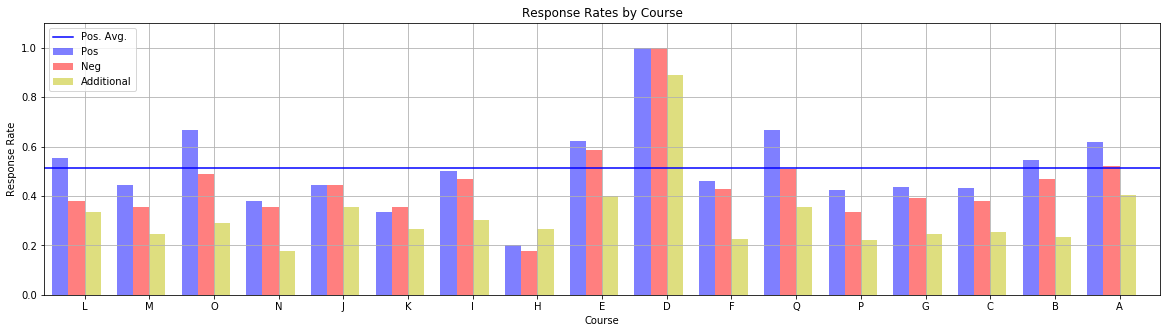

In [3]:
# N = number of courses
pos = list(range(len(course_data["course"])))
width = 0.25
a = 0.5

fig, ax = plt.subplots(figsize=(20,5))

# Bar with Q1 data
plt.bar(pos, course_data["q1-response-rate"], width, alpha=a, color='b',label=course_data["course"][0])

# Bar with Q2 data
plt.bar([p + width for p in pos], course_data["q2-response-rate"], width, alpha=a, color='r', label=course_data["course"][1])

# Bar with additional
plt.bar([p + width * 2 for p in pos], course_data["q3-response-rate"], width, alpha=a, color='y', label=course_data["course"][2])

# Put horizontal mean lines for each variable
#q1
plt.axhline(y=q1_mean, xmin=0, xmax=1, color='b')

#q2
# plt.axhline(y=q2_mean, xmin=0, xmax=1, color='r')


# Set y-axis labsl
ax.set_ylabel("Response Rate")
ax.set_xlabel("Course")

# Set chart title
ax.set_title("Response Rates by Course")

# Set position of x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set labels for x ticks
ax.set_xticklabels(course_data["course"])

# Set x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(course_data["q1-response-rate"])+.1])

# Add legend and show
plt.legend(["Pos. Avg.","Pos", "Neg", "Additional"], loc="upper left")
plt.grid()
plt.show()
fig.savefig("Figures/response-rate-pos-avg.png")

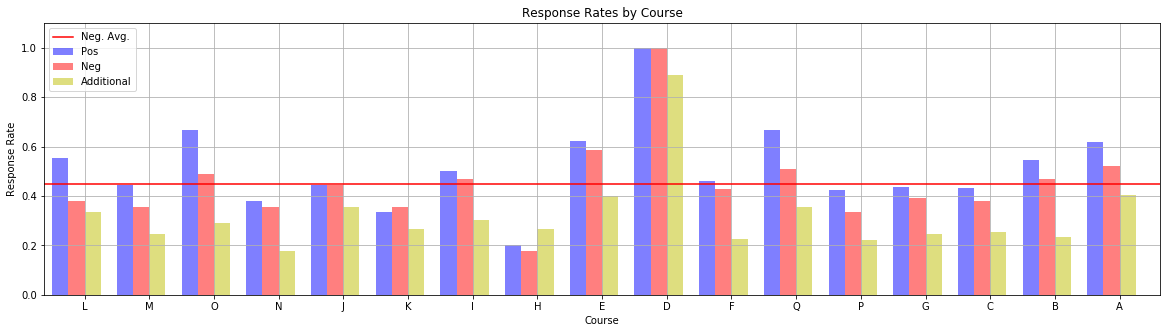

In [4]:
fig, ax = plt.subplots(figsize=(20,5))

# Bar with Q1 data
plt.bar(pos, course_data["q1-response-rate"], width, alpha=a, color='b',label=course_data["course"][0])

# Bar with Q2 data
plt.bar([p + width for p in pos], course_data["q2-response-rate"], width, alpha=a, color='r', label=course_data["course"][1])

# Bar with additional
plt.bar([p + width * 2 for p in pos], course_data["q3-response-rate"], width, alpha=a, color='y', label=course_data["course"][2])

# Put horizontal mean lines for each variable
#q1
# plt.axhline(y=q1_mean, xmin=0, xmax=1, color='b')

#q2
plt.axhline(y=q2_mean, xmin=0, xmax=1, color='r')


# Set y-axis labsl
ax.set_ylabel("Response Rate")
ax.set_xlabel("Course")

# Set chart title
ax.set_title("Response Rates by Course")

# Set position of x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set labels for x ticks
ax.set_xticklabels(course_data["course"])

# Set x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(course_data["q1-response-rate"])+.1])

# Add legend and show
plt.legend(["Neg. Avg.","Pos", "Neg", "Additional"], loc="upper left")
plt.grid()
plt.show()
fig.savefig("Figures/response-rate-neg-avg.png")

<h3>Word Count</h3>

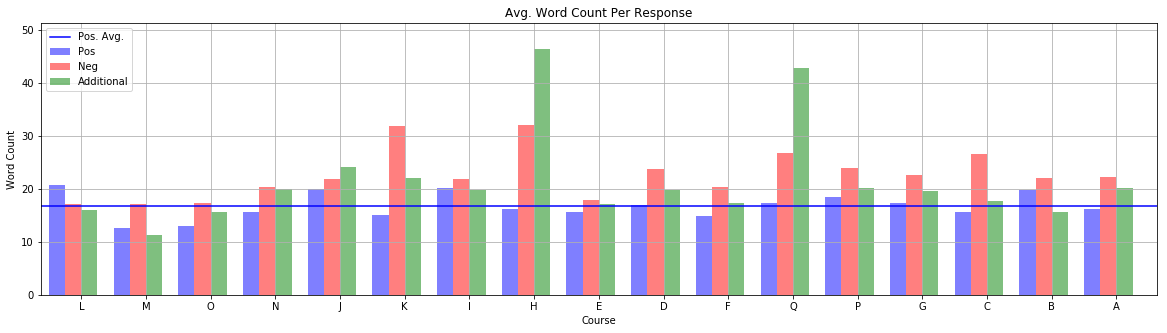

In [5]:
fig, ax = plt.subplots(figsize=(20,5))

# Bar with Q1 data
plt.bar(pos, course_data["q1-avg-word-count"], width, alpha=a, color='b',label=course_data["course"][0])

# Bar with Q2 data
plt.bar([p + width for p in pos], course_data["q2-avg-word-count"], width, alpha=a, color='r', label=course_data["course"][1])

# Bar with additional
plt.bar([p + width * 2 for p in pos], course_data["q3-avg-word-count"], width, alpha=a, color='g', label=course_data["course"][2])

# Put horizontal mean lines for each variable
#q1
plt.axhline(y=q1_wdcnt_mean, xmin=0, xmax=1, color='b')

#q2
# plt.axhline(y=q2_mean, xmin=0, xmax=1, color='r')


# Set y-axis labsl
ax.set_ylabel("Word Count")
ax.set_xlabel("Course")

# Set chart title
ax.set_title("Avg. Word Count Per Response")

# Set position of x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set labels for x ticks
ax.set_xticklabels(course_data["course"])

# Set x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(course_data["q3-avg-word-count"])+5])

# Add legend and show
plt.legend(["Pos. Avg.","Pos", "Neg", "Additional"], loc="upper left")
plt.grid()
plt.show()
fig.savefig("Figures/wordcount-pos-avg.png")

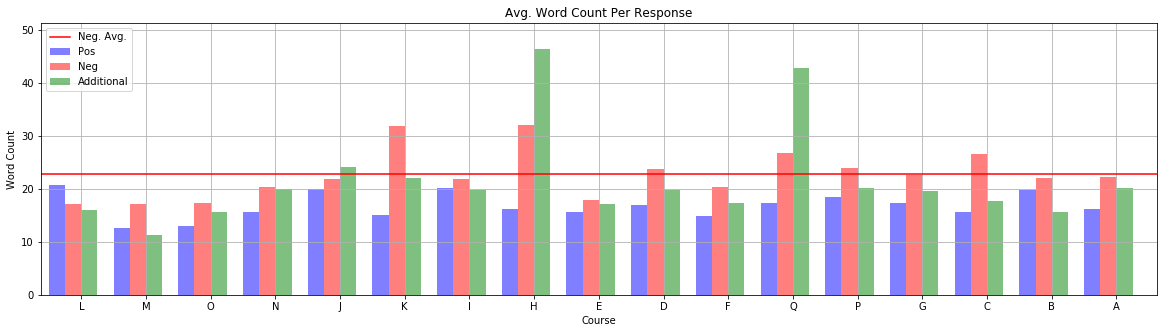

In [6]:
fig, ax = plt.subplots(figsize=(20,5))

# Bar with Q1 data
plt.bar(pos, course_data["q1-avg-word-count"], width, alpha=a, color='b',label=course_data["course"][0])

# Bar with Q2 data
plt.bar([p + width for p in pos], course_data["q2-avg-word-count"], width, alpha=a, color='r', label=course_data["course"][1])

# Bar with additional
plt.bar([p + width * 2 for p in pos], course_data["q3-avg-word-count"], width, alpha=a, color='g', label=course_data["course"][2])

# Put horizontal mean lines for each variable
#q1
# plt.axhline(y=q1_wdcnt_mean, xmin=0, xmax=1, color='b')

#q2
plt.axhline(y=q2_wdcnt_mean, xmin=0, xmax=1, color='r')


# Set y-axis labsl
ax.set_ylabel("Word Count")
ax.set_xlabel("Course")

# Set chart title
ax.set_title("Avg. Word Count Per Response")

# Set position of x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set labels for x ticks
ax.set_xticklabels(course_data["course"])

# Set x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(course_data["q3-avg-word-count"])+5])

# Add legend and show
plt.legend(["Neg. Avg.","Pos", "Neg", "Additional"], loc="upper left")
plt.grid()
plt.show()
fig.savefig("Figures/wordcount-neg-avg.png")